# Lab 2 : Linear Classification, Logistic Regression, SVM, PCA, Decision Tree

---


Total Points: **90**

Tentative Weightage : **9%**

Submission Deadline :  **$20^{th}$ March 2023 , 10:00 AM** (4 weeks)

Submit a separate report to mention any observations asked in the corresponding questions. Without these observations, no points will be provided for the corresponding question.
---



General Instructions:

---



1. You have to do this lab individually
2. You may use **seaborn, matplotlib, pandas, numpy, csv**
3. All the code should be submitted in the form of a single Jupyter notebook itself.
4. Points for each sub-section are mentioned in the appropriate question.
5. You can use Google colab to run a jupyter notebook (https://colab.research.google.com/) How to load data in Google Colab ?(https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92) (https://www.marktechpost.com/2019/06/07/how-to-connect-google-colab-with-google-drive/). You can also run it in your local anaconda jupyter notebook.
6. The lab must be submitted on Google classroom. The code as well as the accompanying observations (report pdf) should be made part of the assignment.
7. **Code Readability** is very important. Modularize your code by making use of classes, functions that can be flexibly reused wherever necessary. Also use self explanatory variable names and add comments to describe your approach wherever necessary. You may add additional code or text blocks as necessary.
8. You are expected to submit your **observations** (preferably in a separate pdf file) and not just an error free code.
9. Students are expected to follow the **honor code** of the class.
10. The deadline is strict and any assignment submitted later will not
be consider for evaluation unless you take prior permission (at least 4 days before the submission deadline).
11. The marks will be given on the basis of quality of code, use of innovative data structures, scalability, correctness, and completeness of the reported observation.
12. In case of any queries regarding Lab 2, please mail the TAs (emails are provided on the google classroom).

**Best Wishes**


**TASK 1**: Classification                                     **(27 Marks)**

Indian Institute of Technology Ropar is planning to start machine learning based shortlisting criteria for Ph.D admissions. To analyze this problem let us start with a small user friendly dataset given in filename - 'classification_data1.txt'. The dataset contains performance in two entrance exams namely GATE and UGC-NET. With respect to this dataset, implement/report following:

1. Plot the dataset using different colors for the two classes. (2 Marks)

2. Implement the least square method for classification and plot the decision boundary. Clearly describe your results/observations in report. Is the decision boundary able to classify the points correctly? (4+3+3 Marks)

3. Usually, machine learning models, while training involves certain randomness. One example is splitting our data set into train and test sets. 
Each of you might generate entirely different train and test instances. We usually fix the seed value before executing our code to handle such issues. These seed values are used in generating random numbers. We run our code over different seed values to avoid uncertainities over selecting different train and test instances. The overall accuracy (or loss) results are reported as mean and standard deviation over these independent runs. Let's learn this idea via the following:

 3a) Implement a logistic regressor using the gradient descent method. 
Train the model on $80\%$ of a randomly divided dataset with a fixed learning rate $\beta$. Report the find the training and testing accuracy over $10$ independent runs. (5 Marks)

 3b) Repeat the previous experiment with different learning rates $\beta$ (of your choice) and plot the training, testing accuracies over $10$ independent runs for each $\beta$ value. (3 + 3 Marks)

 3c) Plot the classifier and decision boundary for the best regressor. Does the performance improve in comparison to least square method? (4 Marks)


**NOTE:** You can take seed values to be 0,100,200,300,$\ldots$,1000. (You can take any other values as well. Fix seedvalue from both numpy and random package).

Write your code by creating cells below.


In [170]:
#Write your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [171]:
#write your code here You can create more cells
data = pd.read_csv("Sazid Ali - classification_data1.txt", sep=',', header=None, names=["Gate", "UGC","Label"])
data.head()

,Gate,UGC,Label
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [172]:
len(data)

100

In [173]:
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

### Task 1.1 Plot the dataset using different colors for the two classes

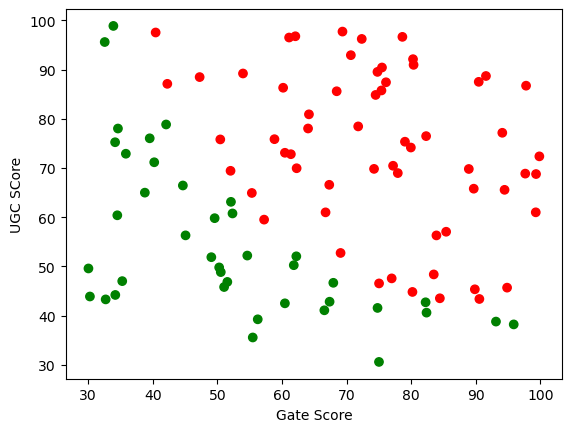

In [174]:
colors = np.where(y == 1, 'red', 'green')
plt.scatter(X[:,0], X[:,1],c=colors)
plt.xlabel("Gate Score")
plt.ylabel("UGC SCore")
plt.show()

### Task 1.2 Implement the least square method for classification and plot the decision boundary. 

In [175]:
ones = np.ones((len(X),1))
new_X = np.append(ones,X,axis=1)

In [176]:
new_X_t = new_X.T
opt_w = np.linalg.inv(new_X_t.dot(new_X)).dot(new_X_t).dot(y)

In [177]:
x1 = (0.5 - opt_w[0])/opt_w[1]
x2 = (0.5 - opt_w[0])/opt_w[2]

x_coord = [0, x2]
y_coord = [x1, 0]

print(x_coord)
print(y_coord)

[0, 128.92517314296558]
[121.11799101878123, 0]


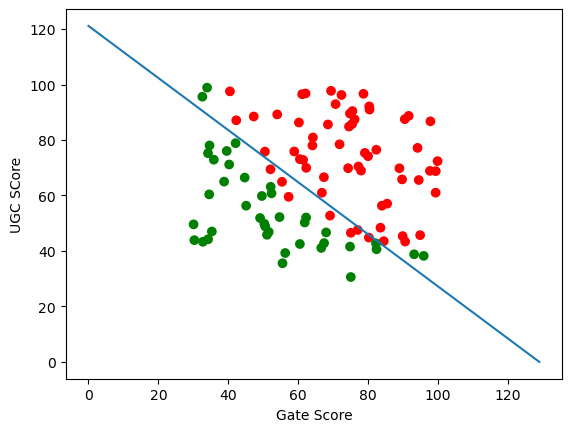

In [178]:
plt.scatter(X[:,0], X[:,1],c=colors)
plt.plot(x_coord, y_coord)
plt.xlabel("Gate Score")
plt.ylabel("UGC SCore")
plt.show()

In [179]:
y_pred = new_X.dot(opt_w)
y_pred = 1 / (1 + np.exp(-y_pred))

for i in range(len(y_pred)):
    if y_pred[i] > 0.5 :
        y_pred[i] = 1
    else:
        y_pred[i] = 0

count = 0

for i in range(len(y_pred)):
    if y_pred[i] == y[i]:
        count += 1

acc = count / len(y)
acc *= 100

print(f"Accuracy = {acc}")    

Accuracy = 65.0


In [180]:
misclassified_data = len(y) - count
print(f"Number of misclassified data points = {misclassified_data} in total points = {len(y)} ")

Number of misclassified data points = 35 in total points = 100 


## 1.3a) Implement a logistic regressor using the gradient descent method. Train the model on  80% of a randomly divided dataset with a fixed learning rate  𝛽

In [181]:
X_norm = X
X_norm[:,0] = (X_norm[:,0] - min(X_norm[:,0])) / (max(X_norm[:,0]) - min(X_norm[:,0]))
X_norm[:,1] = (X_norm[:,1] - min(X_norm[:,1])) / (max(X_norm[:,1]) - min(X_norm[:,1]))

ones = np.ones((len(X_norm),1))
new_X = np.append(ones,X_norm,axis=1)

In [182]:
def gradient_descent(x,y,w,beta,num_iter= 1500):
    m = len(y)
    
    for i in range(num_iter):
        a = np.dot(w,x.T)
        y_pred = 1 / (1 + np.exp(-a))
        error = y_pred - y
        gradient = 1/m * np.dot(x.T, error)  
        w = w - (beta * gradient)
    return w    

In [183]:
def find_accuracy(x,y,w):
    y_pred = x.dot(opt_w)
    y_pred = 1 / (1 + np.exp(-y_pred))

    for i in range(len(y_pred)):
        if y_pred[i] > 0.5 :
            y_pred[i] = 1
        else:
            y_pred[i] = 0
            
#     print(f"actual y = {y}")  
#     print(f"predicted y = {y_pred}")

    count = 0

    for i in range(len(y_pred)):
        if y_pred[i] == y[i]:
            count += 1

    acc = count / len(y)
    acc *= 100
    
    return acc

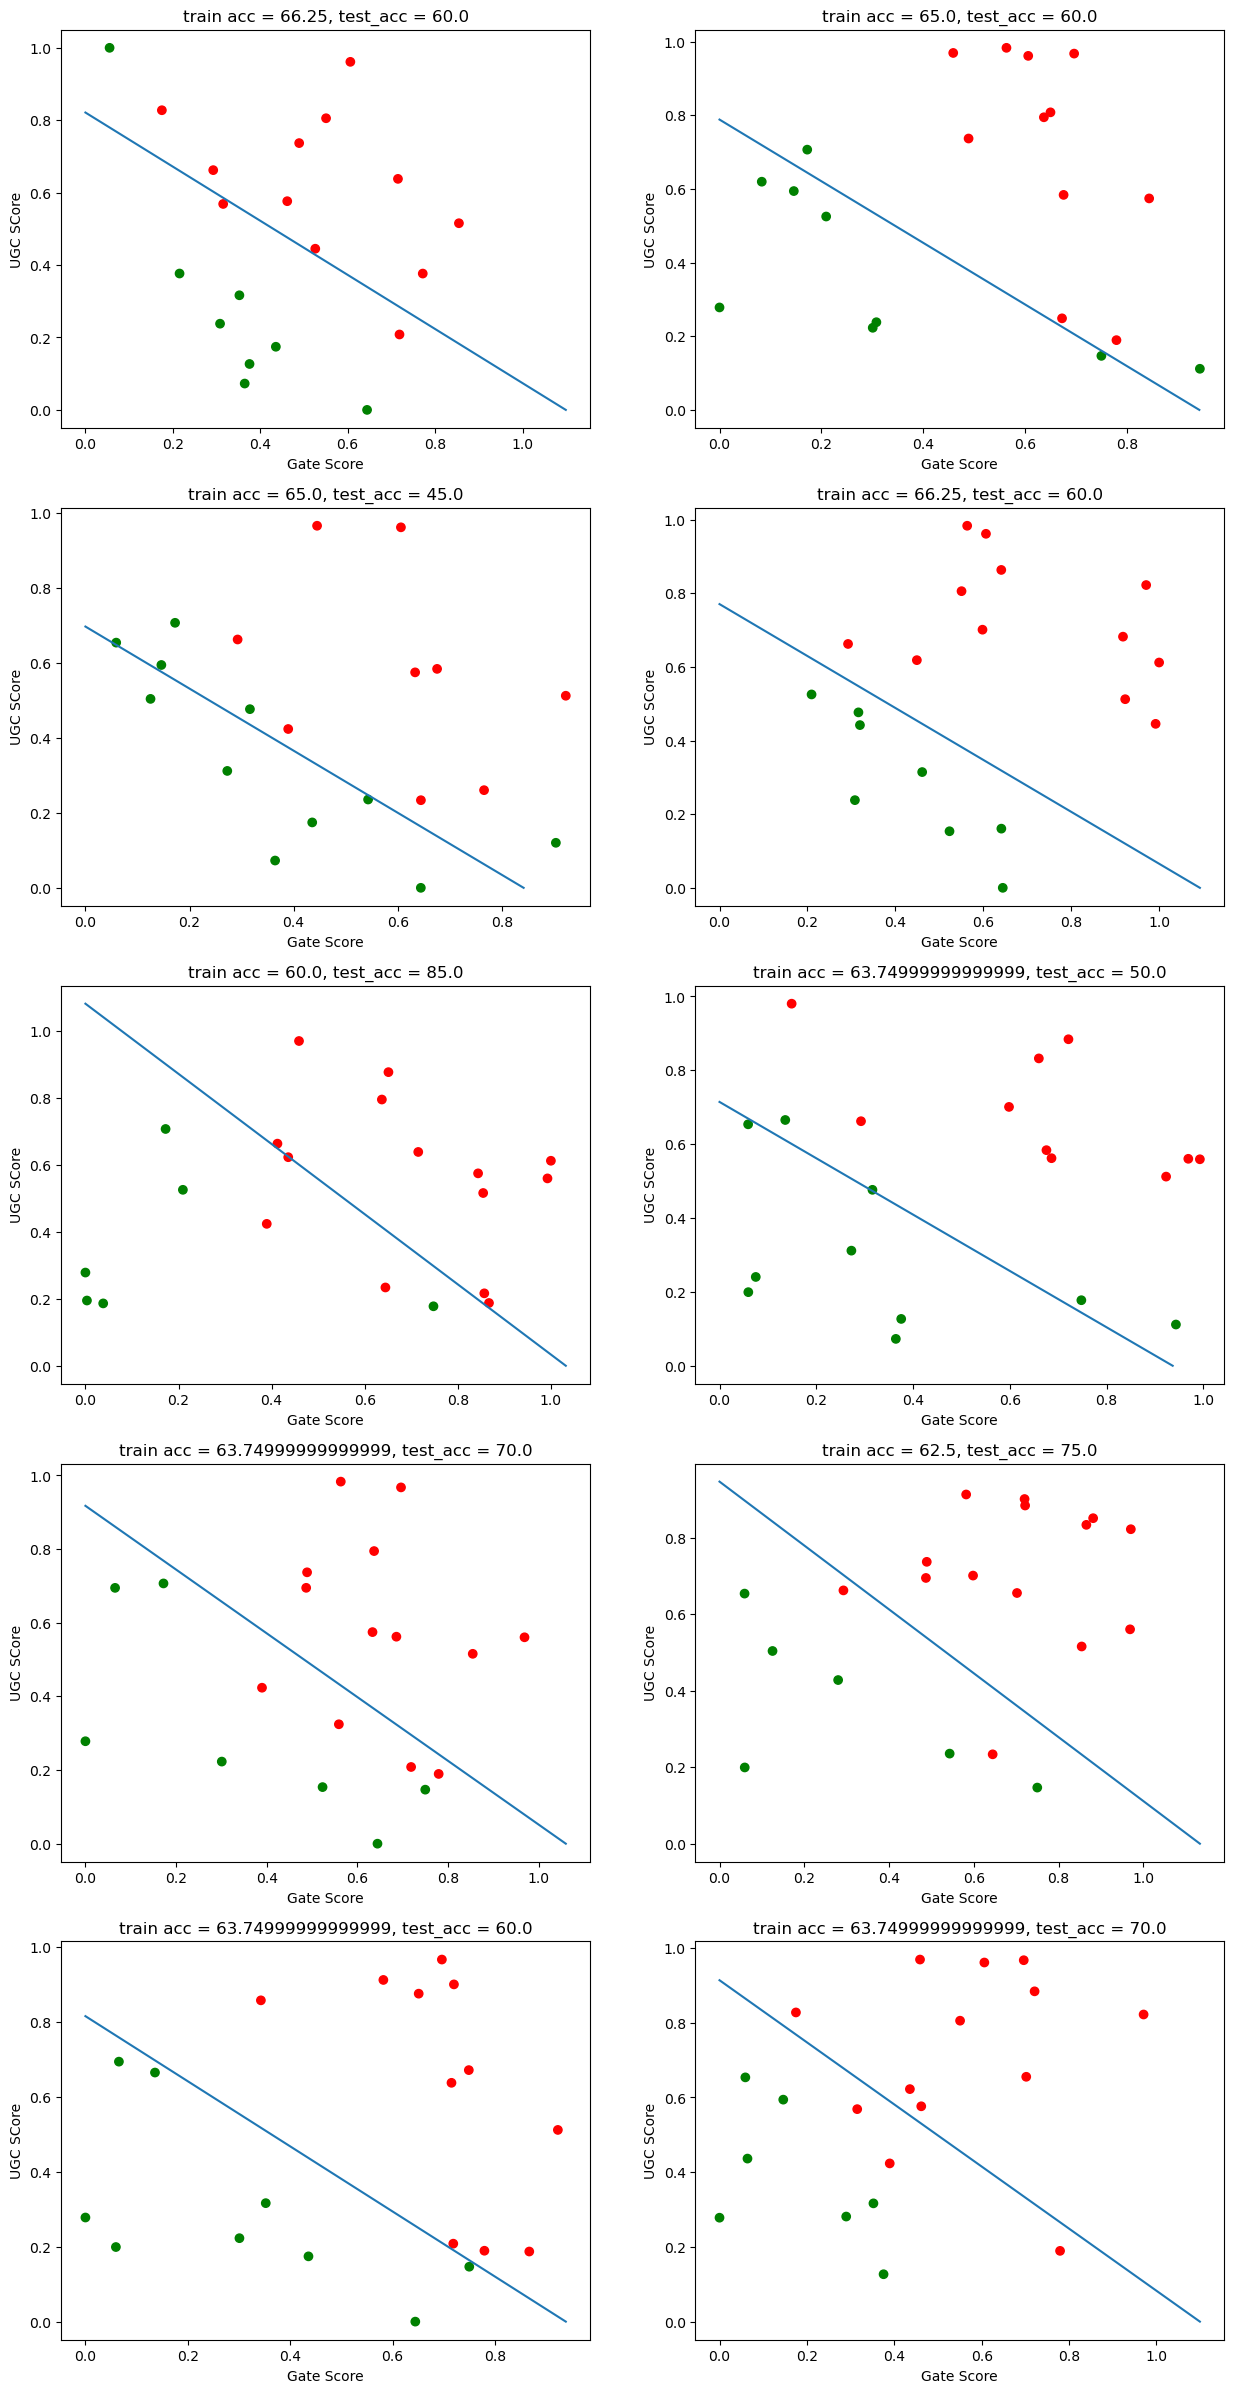

In [184]:
from sklearn.model_selection import train_test_split

random_states = [100,200,300,400,500,600,700,800,900,1000]
train_accuracy = np.zeros(10)
test_accuracy = np.zeros(10)
best_training_acc = 0
best_testing_acc = 0

plt.figure(figsize = [15,30])

i = 1
for st in random_states:
    x_train,x_test,y_train,y_test = train_test_split(new_X,y,test_size=0.2, random_state=st)
    w = np.zeros(3)
    opt_w = gradient_descent(x_train,y_train,w,0.01)
    
    x1 = (0.5 - opt_w[0])/opt_w[1]
    x2 = (0.5 - opt_w[0])/opt_w[2]
    x_coord = [0, x2]
    y_coord = [x1, 0]
    
    train_acc = find_accuracy(x_train,y_train,opt_w)
    test_acc = find_accuracy(x_test,y_test,opt_w)
    
    if train_acc > best_training_acc:
        best_training_acc = train_acc
        
    if test_acc > best_testing_acc:
        best_testing_acc = test_acc
    
    train_accuracy[i-1] = train_acc
    test_accuracy[i-1] = test_acc
   
    colors = np.where(y_test == 1, 'red', 'green')
    plt.subplot(5,2,i, title=f"train acc = {train_acc}, test_acc = {test_acc}")
    i = i+1
    plt.scatter(x_test[:,1], x_test[:,2],c=colors)
    plt.plot(x_coord,y_coord)
    plt.xlabel("Gate Score")
    plt.ylabel("UGC SCore")

In [185]:
print(f"Best training accuracy = {best_training_acc}")
print(f"Best testing accuracy = {best_testing_acc}")

Best training accuracy = 66.25
Best testing accuracy = 85.0


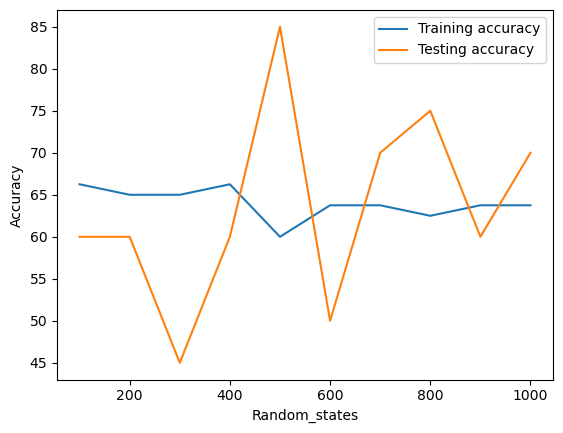

In [43]:
plt.plot(random_states, train_accuracy)
plt.plot(random_states, test_accuracy)
plt.xlabel("Random_states")
plt.ylabel("Accuracy")
plt.legend(["Training accuracy", "Testing accuracy"])
plt.show()

## 1.3b) Repeat the previous experiment with different learning rates  𝛽 (of your choice) and plot the training, testing accuracies over  10 independent runs for each  𝛽 value.

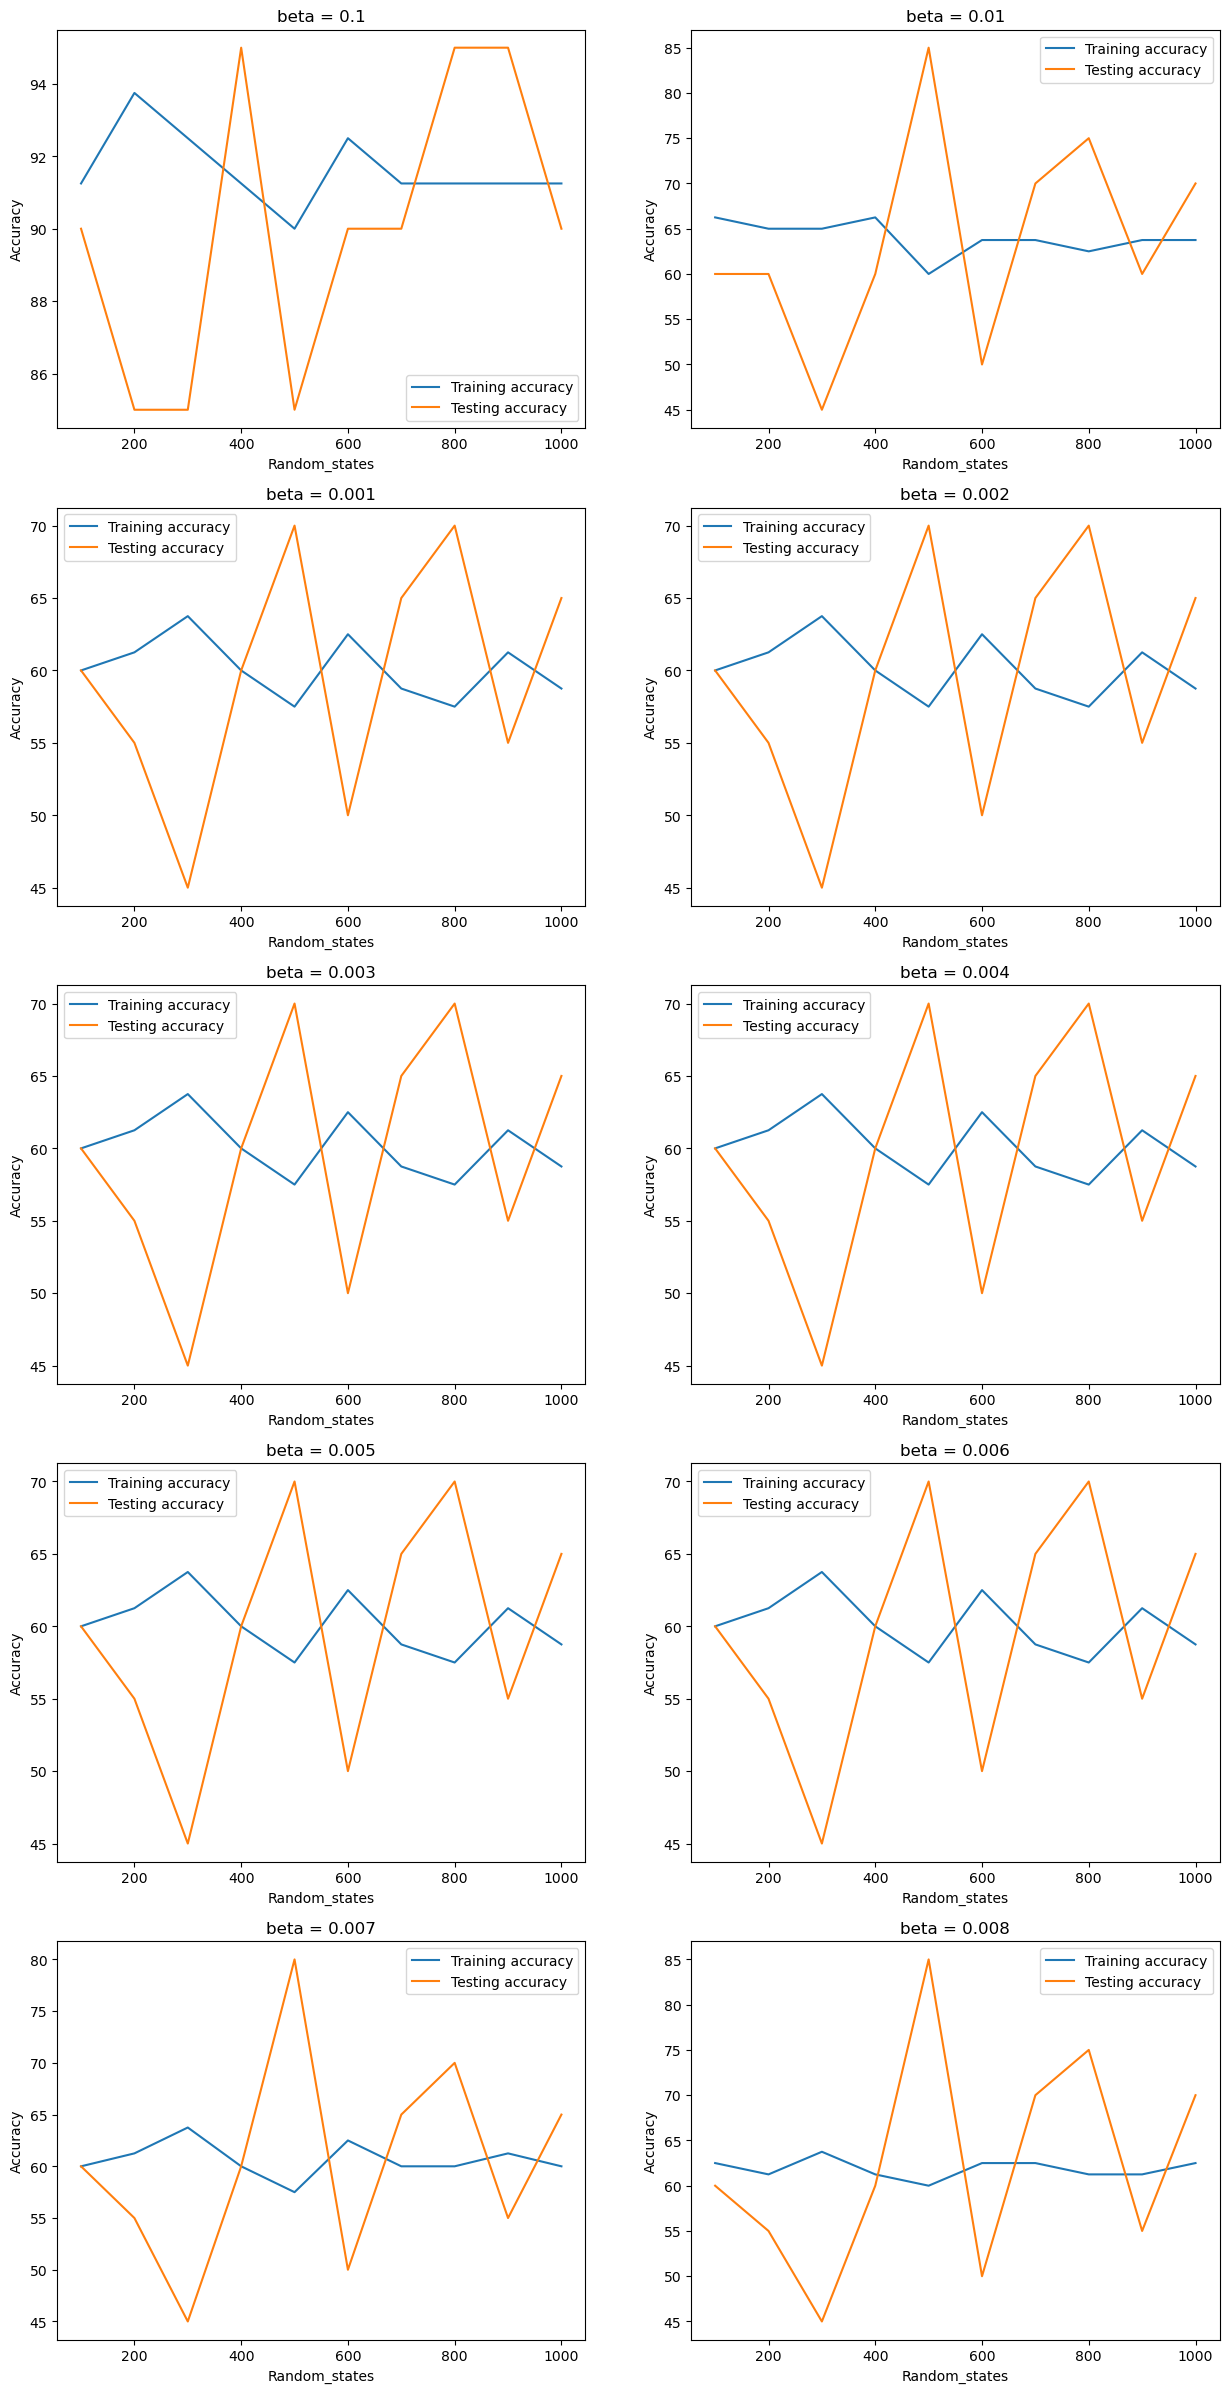

In [44]:
from sklearn.model_selection import train_test_split

random_states = [100,200,300,400,500,600,700,800,900,1000]
betas = [0.1,0.01,0.001,0.002,0.003,0.004,0.005,0.006,0.007,0.008]


plt.figure(figsize = [15,30])

best_beta = 0
best_random_state = 0
best_w = []
best_accuracy = 0



j = 1
for beta in betas:
    train_accuracy = np.zeros(10)
    test_accuracy = np.zeros(10)
    i = 1
    for st in random_states:
        x_train,x_test,y_train,y_test = train_test_split(new_X,y,test_size=0.2, random_state=st)
        w = np.zeros(3)
        opt_w = gradient_descent(x_train,y_train,w,beta)

        x1 = (0.5 - opt_w[0])/opt_w[1]
        x2 = (0.5 - opt_w[0])/opt_w[2]
        x_coord = [0, x2]
        y_coord = [x1, 0]

        train_acc = find_accuracy(x_train,y_train,opt_w)
        test_acc = find_accuracy(x_test,y_test,opt_w)

        train_accuracy[i-1] = train_acc
        test_accuracy[i-1] = test_acc
        i = i+1
        
        if train_acc > best_accuracy:
            best_beta = beta
            best_random_state = st
            best_w = opt_w
            best_accuracy = train_acc

        
    plt.subplot(5,2,j, title=f"beta = {beta}")
    j = j+1
    plt.plot(random_states, train_accuracy)
    plt.plot(random_states, test_accuracy)
    plt.xlabel("Random_states")
    plt.ylabel("Accuracy")
    plt.legend(["Training accuracy", "Testing accuracy"])

##  Task 1.3c Plot the classifier and decision boundary for the best regressor. Does the performance improve in comparison to least square method?

### Answer : Yes, performance improved in gradient descent method. In least square method, best accuracy was 65%, but for gradient descent method, best accuracy is 93.75%

best accuracy = 93.75


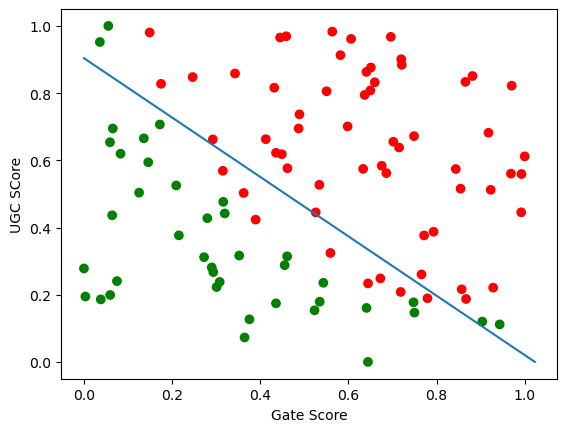

In [45]:
print(f"best accuracy = {best_accuracy}")

x1 = (0.5 - best_w[0])/best_w[1]
x2 = (0.5 - best_w[0])/best_w[2]
x_coord = [0, x2]
y_coord = [x1, 0]

colors = np.where(y == 1, 'red', 'green')
plt.scatter(new_X[:,1], new_X[:,2],c=colors)
plt.plot(x_coord,y_coord)
plt.xlabel("Gate Score")
plt.ylabel("UGC SCore")
plt.show()




**TASK 2**: Classification (Continued)                        **(14 Marks)**

Now lets change the dataset and load classification_data2.txt 

1. Plot the dataset with color coding as in previous task. (2 Marks)

2. Implement regularized (ridge regression) based logistic regressor using gradient descent. Additionally since the data is non-linear we will map the input to a $28$ dimensional vector given by $[1, x_1, x_2, x_1^2, x_1 x_2, x_2^2, x_1^3, \ldots, x_1 x_2^5, x_2^6]$. (6 Marks)

Now we can manage to prevent overfitting in high dimension using regularizaiton. So for different regularization parameter say $\lambda$ plot non linear decision boundaries. Can you identify cases of underfitting, or overfitting? Report the observations in separate report.  (4 + 2 Marks)

**NOTE**: To plot non-linear boundary you can try to find the output of classifier on evenly spaced grid and than draw the contor plot wherever output changes from say shortlisted to not shortlisted. 


Write your code by creating cells below.


## Task 2: 1. Plot the dataset with color coding as in previous task

In [145]:
#write your code here You can create more cells
data = pd.read_csv("Sazid Ali - classification_data2.txt", sep=',', header=None, names=["Gate", "UGC","Label"])
data.head()

,Gate,UGC,Label
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [146]:
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

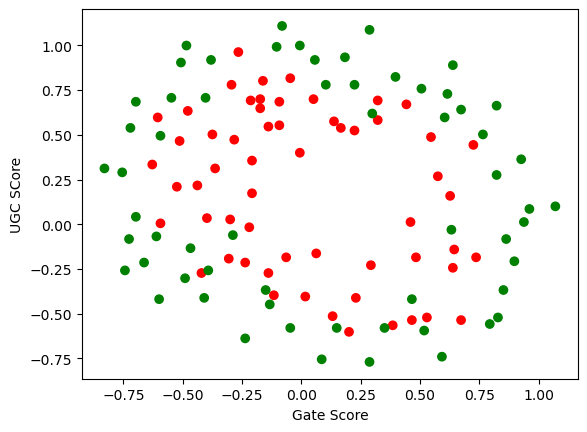

In [147]:
colors = np.where(y == 1, 'red', 'green')
plt.scatter(X[:,0], X[:,1],c=colors)
plt.xlabel("Gate Score")
plt.ylabel("UGC SCore")
plt.show()

## Task 2 : 2. Implement regularized (ridge regression) based logistic regressor using gradient descent. Additionally since the data is non-linear we will map the input to a  28 dimensional vector given by  [1,𝑥1,𝑥2,𝑥21,𝑥1𝑥2,𝑥22,𝑥31,…,𝑥1𝑥52,𝑥62]
 .

In [148]:
def mapFeaturePlot(x1,x2,degree):   
    x = np.zeros(29)
    x[0] = 1
    k = 1
    for i in range(1,degree+1):
        for j in range(i+1):
            x[k]= (x1**(i-j) * x2**j)  
            k = k+1
    return x

In [149]:
new_x = np.ones((len(X),1))

m = len(X)

x1 = X[:,0]
x2 = X[:,1]

temp = np.zeros((m,28))

for i in range(m):
    j = 0
    for d_i in range(1,7):
        for d_j in range(d_i + 1):
            temp[i-1][j-1] = x1[i-1]**(d_i - d_j) * x2[i-1]**d_j
            j = j + 1
new_x = np.hstack((new_x, temp))            

In [150]:
# Gradient Descent Method

def gradient_descent_reg(x,y,w,l_r,num_iter,lmbda):
    m = len(y)
    
    for i in range(num_iter):
        a = np.dot(w,x.T)
        y_pred = 1 / (1 + np.exp(-a))
        error = y_pred - y
        gradient = 1/m * np.dot(x.T, error)  + (lmbda/m)*w
        w = w - (l_r * gradient)
    return w    

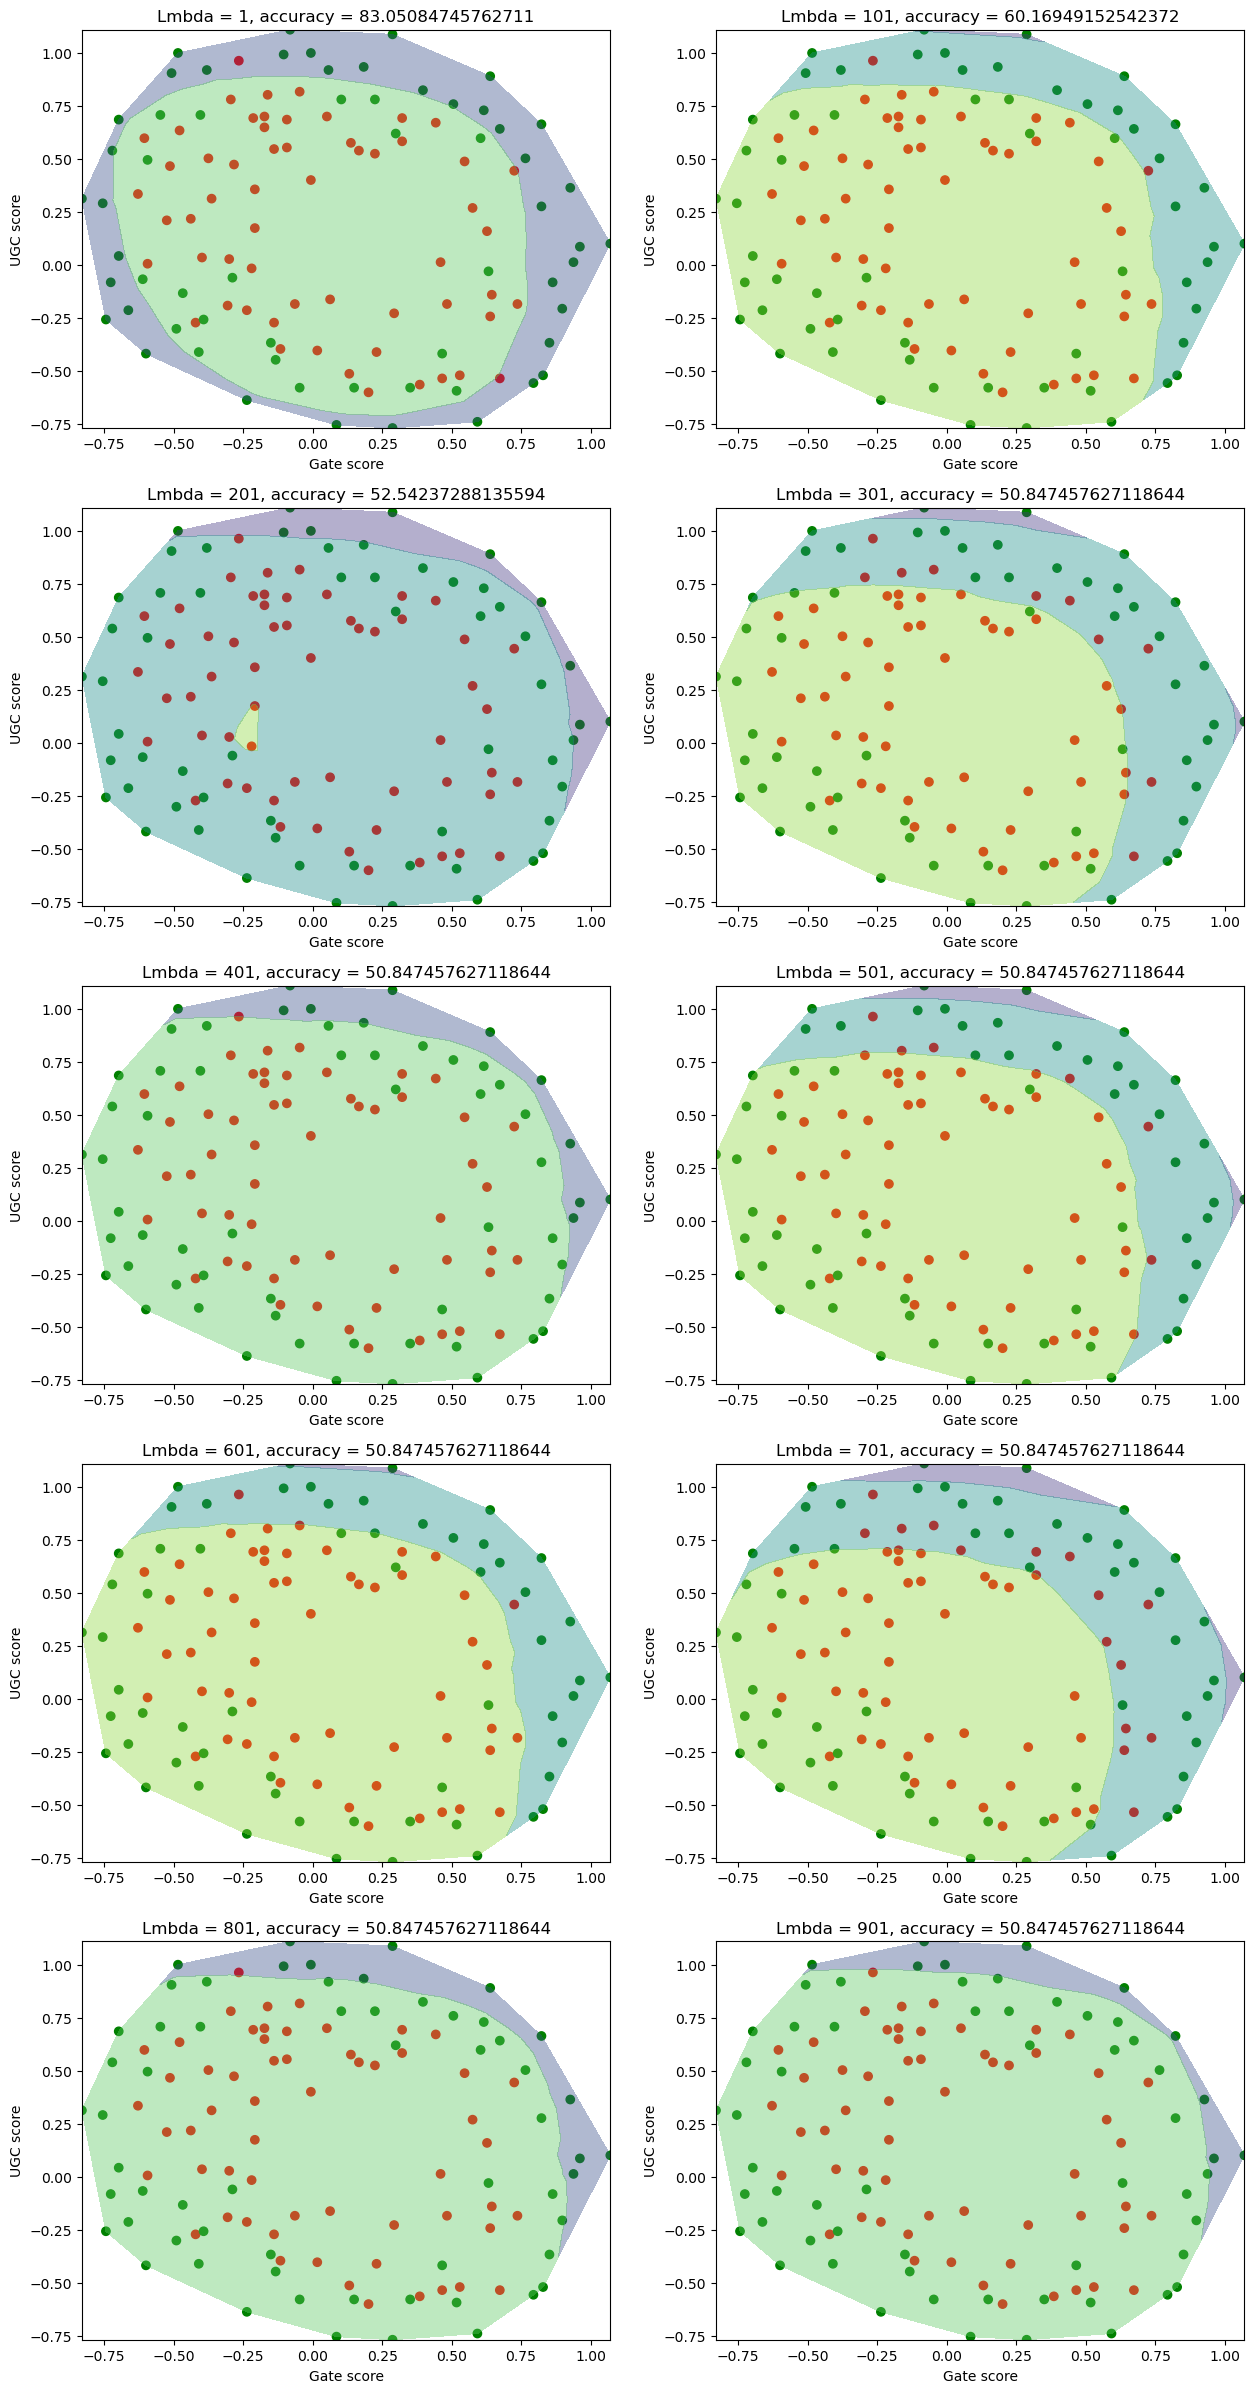

In [167]:
best_acc = 0
best_lmbda = 0.2

plt.figure(figsize = [15,30])

j = 1
for i in range(1,1000,100):
    w = np.zeros(29)
    opt_w = gradient_descent_reg(new_x,y,w,0.1,1500,i)
    
    acc = find_accuracy(new_x,y,opt_w)
    
    if acc > best_acc:
        best_acc = acc
        best_lmbda = i
    
    y_pred = new_x.dot(opt_w)
    y_pred = 1/(1+np.exp(-y_pred))
    
    plt.subplot(5,2,j, title=f"Lmbda = {i}, accuracy = {acc}")
    j = j+1
    
    colors = np.where(y == 1, 'red', 'green')
    plt.scatter(X[:,0], X[:,1],c=colors)
    plt.tricontourf(X[:,0], X[:,1], y_pred.reshape(len(y_pred),), 1, alpha = 0.4)
    plt.xlabel("Gate score")
    plt.ylabel("UGC score")


In [160]:
print(f"Best accuracy = {best_acc} obtained at lmbda = {best_lmbda}")

Best accuracy = 83.05084745762711 obtained at lmbda = 1


In [163]:
w = np.zeros(29)
opt_w = gradient_descent_reg(new_x,y,w,0.1,1500,best_lmbda)

In [164]:
acc = find_accuracy(new_x,y,opt_w)
print(f"accuracy = {acc}")

accuracy = 83.05084745762711


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


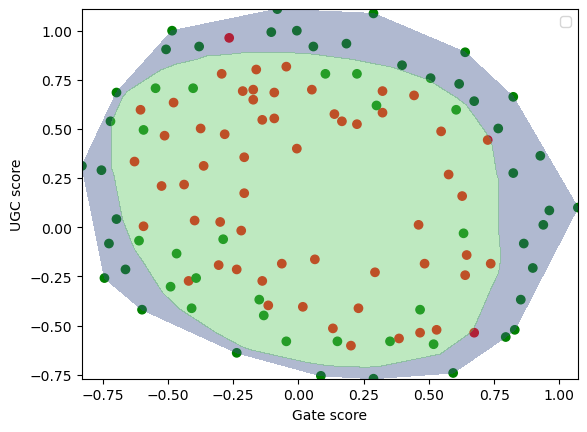

In [165]:
y_pred = new_x.dot(opt_w)
y_pred = 1/(1+np.exp(-y_pred))
# y_pred = np.where(y_pred > 0.5, 1,0)

colors = np.where(y == 1, 'red', 'green')
plt.scatter(X[:,0], X[:,1],c=colors)
plt.tricontourf(X[:,0], X[:,1], y_pred.reshape(len(y_pred),), 1, alpha = 0.4)
plt.xlabel("Gate score")
plt.ylabel("UGC score")
plt.legend(loc=0)
plt.show()

**TASK 3**: SVM                         **(25 Marks)**

Now lets change the dataset and load SVM_data1.csv 

1. Load the dataset from file - SVM_data1.csv and Plot the dataset with color coding as in previous task. (2 Marks)

2. Implement a SVM classifier. Try to find the optimal penalty (or regularization) parameter $C$. Plot the decision boundary for optimal classifier. Also plot the number of violated points (misclassified points) and number of support vectors on Y axis against different $C$ values on X-axis. Report your observations. (2 + 2 + 2 + 3 + 2 + 2 Marks)

3. Load the dataset from file - SVM_data2.csv Try to fit a non linear SVM say polynomial kernel (degree=$2$) and RBF kernel.  Compare the results for both classifier. Does RBF leads to overfitting? Plot the decision boundary for optimal classifier in both kernels. (1+2+2+3+2+2 Marks)
 

Write your code by creating cells below.


**NOTE**: Sample decision boundary plot (can be of either type or any new creative solutions are also welcomed:
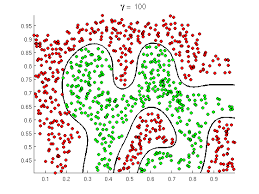
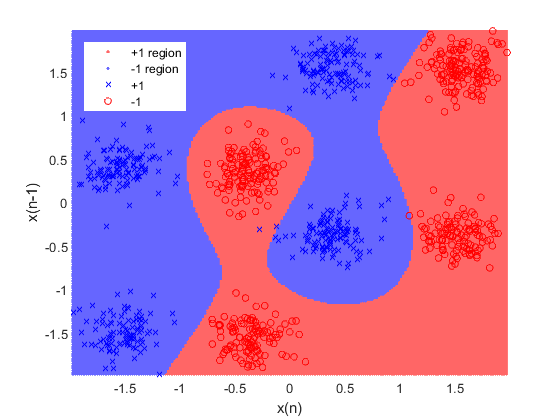


## Task 3.1 Load the dataset from file - SVM_data1.csv and Plot the dataset with color coding as in previous task.

In [90]:
#write your code here You can create more cells
data = pd.read_csv("Sazid Ali - SVM_data1.csv")
data.head()

,GATE,UGC,Label
0,1.9643,4.5957,1
1,2.2753,3.8589,1
2,2.9781,4.5651,1
3,2.9320,3.5519,1
4,3.5772,2.8560,1


In [91]:
#write your code here You can create more cells
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values
y = np.where(y == 0, -1, y)

X_norm = X
X_norm[:,0] = (X_norm[:,0] - min(X_norm[:,0])) / (max(X_norm[:,0]) - min(X_norm[:,0]))
X_norm[:,1] = (X_norm[:,1] - min(X_norm[:,1])) / (max(X_norm[:,1]) - min(X_norm[:,1]))
x = X_norm

In [92]:
len(X)

51

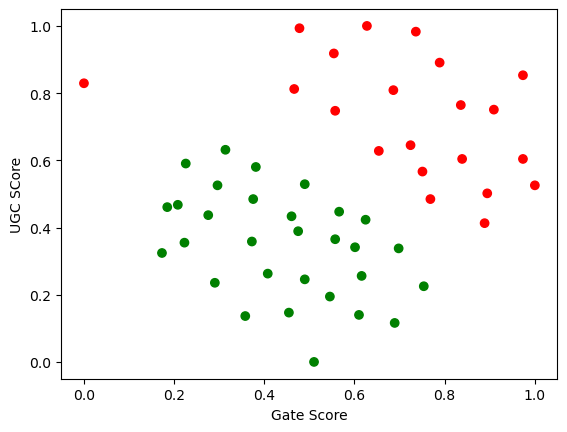

In [93]:
colors = np.where(y == 1, 'red', 'green')
plt.scatter(X[:,0], X[:,1],c=colors)
plt.xlabel("Gate Score")
plt.ylabel("UGC SCore")
plt.show()

## 3.2 Implement a SVM classifier. Try to find the optimal penalty (or regularization) parameter  𝐶. Plot the decision boundary for optimal classifier. Also plot the number of violated points (misclassified points) and number of support vectors on Y axis against different  𝐶 values on X-axis.

In [94]:
from cvxopt import matrix, solvers

num_violated_pts = []
num_support_vec = []
C_arr = []
best_acc = 0
best_c = 2

for c in range(1, 1000,50):
    n = len(y)
    C_arr.append(c)

    # kernel matrix
    K = np.dot(x, x.T)
    P = matrix(np.outer(y,y)*K)
    q = matrix(-np.ones((n,1)))
    G = matrix(np.vstack((np.eye(n)*-1, np.eye(n))))
    h = matrix(np.hstack((np.zeros(n), np.ones(n)*c)))
    A = matrix(y, (1,n), 'd')
    b = matrix(np.zeros(1))
    solvers.options['show_progress'] = False
    sol = solvers.qp(P,q,G,h,A,b)
    alphas = np.array(sol['x'])
    
    threshold = 1e-5
    sv = ((alphas > threshold) * (alphas < c)).flatten()
    opt_w = np.dot(x[sv].T, alphas[sv]*y[sv, np.newaxis])
    
    b = np.mean(y - x.dot(opt_w))
    
    y_pred = x.dot(opt_w) + b
    y_pred = 1 / (1 + np.exp(-y_pred))

    for i in range(len(y_pred)):
        if y_pred[i] >= 0.5 :
            y_pred[i] = 1
        else:
            y_pred[i] = -1

    count = 0

    for i in range(len(y_pred)):
        if y_pred[i] == y[i]:
            count += 1

    acc = count / len(y)
    acc *= 100
    
    if best_acc < acc:
        best_acc = acc
        best_c = c
        
    mis_classified = len(y) - count

    num_sv = np.count_nonzero(sv == True)
    
    num_violated_pts.append(mis_classified)
    
    num_support_vec.append(num_sv)

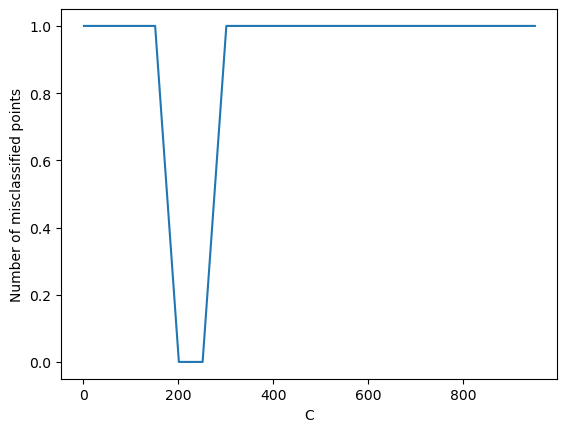

In [95]:
plt.plot(C_arr,num_violated_pts)
plt.xlabel("C")
plt.ylabel("Number of misclassified points")
plt.show()

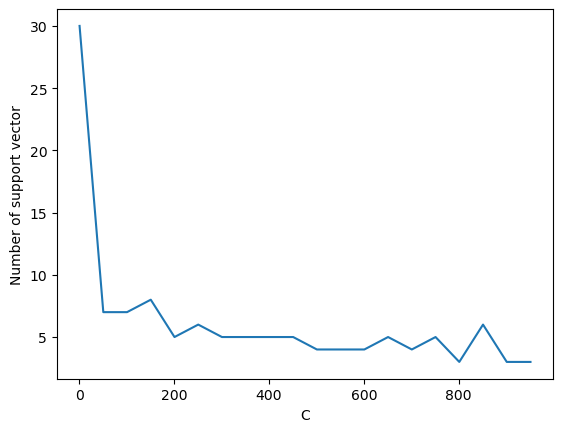

In [96]:
plt.plot(C_arr, num_support_vec)
plt.xlabel("C")
plt.ylabel("Number of support vector")
plt.show()

In [98]:
print(f"Best accuracy = {best_acc}")
print(f"Best C = {best_c}")

Best accuracy = 100.0
Best C = 201


In [99]:
from cvxopt import matrix, solvers

n = len(y)
C = best_c

# kernel matrix
K = np.dot(x, x.T)
P = matrix(np.outer(y,y)*K)
q = matrix(-np.ones((n,1)))
G = matrix(np.vstack((np.eye(n)*-1, np.eye(n))))
h = matrix(np.hstack((np.zeros(n), np.ones(n)*C)))
A = matrix(y, (1,n), 'd')
b = matrix(np.zeros(1))
solvers.options['show_progress'] = False
sol = solvers.qp(P,q,G,h,A,b)
alphas = np.array(sol['x'])


In [100]:
threshold = 1e-5
sv = ((alphas > threshold) * (alphas < C)).flatten()
opt_w = np.dot(x[sv].T, alphas[sv]*y[sv, np.newaxis])
opt_w

array([[10.37472064],
       [18.42627684]])

In [101]:
b = np.mean(y - x.dot(opt_w))
b

-15.24850153589775

In [102]:
y_pred = x.dot(opt_w) + b
y_pred = 1 / (1 + np.exp(-y_pred))

for i in range(len(y_pred)):
    if y_pred[i] >= 0.5 :
        y_pred[i] = 1
    else:
        y_pred[i] = -1

count = 0

for i in range(len(y_pred)):
    if y_pred[i] == y[i]:
        count += 1

acc = count / len(y)
acc *= 100

print(f"accuracy = {acc}")        

accuracy = 100.0


In [103]:
x_points = np.linspace(0,1)
y_points = -(opt_w[0] / opt_w[1]) * x_points - b / opt_w[1]

w_norm = opt_w / np.sqrt(np.sum(opt_w ** 2))
margin = 1 / np.sqrt(np.sum(opt_w ** 2))
decision_boundary_points = np.array(list(zip(x_points, y_points)))
points_of_line_above = decision_boundary_points + w_norm.T * margin
points_of_line_below = decision_boundary_points - w_norm.T * margin


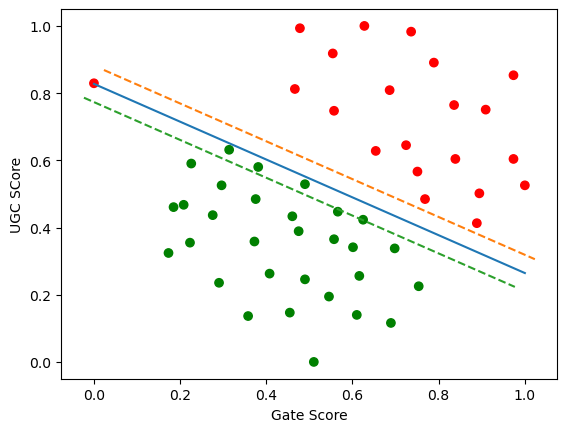

In [104]:
colors = np.where(y == 1, 'red', 'green')
plt.scatter(X_norm[:,0], X_norm[:,1],c=colors)
plt.plot(x_points, y_points)
plt.plot(points_of_line_above[:,0],points_of_line_above[:,1], linestyle='--')
plt.plot(points_of_line_below[:,0],points_of_line_below[:,1], linestyle='--')
plt.xlabel("Gate Score")
plt.ylabel("UGC SCore")
plt.show()

In [105]:
mis_classified = len(y) - count

num_sv = np.count_nonzero(sv == True)

print(f"Number of misclassified example = {mis_classified}")
print(f"Number of support vector = {num_sv}")


Number of misclassified example = 0
Number of support vector = 5


# 3.3 Kernel SVM
Load the dataset from file - SVM_data2.csv Try to fit a non linear SVM say polynomial kernel (degree= 2
 ) and RBF kernel

In [67]:
data = pd.read_csv("Sazid Ali - SVM_data2.csv")
data.head()

,GATE,UGC,Y label
0,0.107140,0.60307,1
1,0.093318,0.64985,1
2,0.097926,0.70541,1
3,0.155530,0.78436,1
4,0.210830,0.86623,1


In [68]:
x = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

y = np.where(y == 0, -1, y)

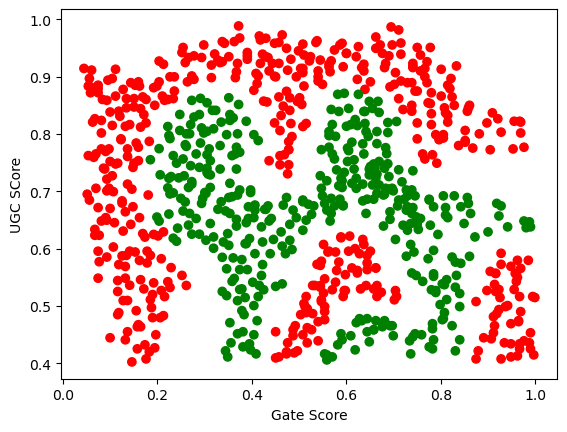

In [69]:
colors = np.where(y == 1, 'red', 'green')
plt.scatter(x[:,0], x[:,1],c=colors)
plt.xlabel("Gate Score")
plt.ylabel("UGC SCore")
plt.show()

## Polynomial Kernel

In [70]:
def get_phi_x(x):
    n,m = x.shape
    new_x = np.zeros((n,6))
    for i in range(n):
        new_x[i][0] = np.sqrt(2)*x[0,0]
        new_x[i][1] = np.sqrt(2)*x[0,1]
        new_x[i][2] = 1
        new_x[i][3] = x[0,0] * x[0,0]
        new_x[i][4] = x[0,1] * x[0,1]
        new_x[i][5] = np.sqrt(2)*x[0,0]*x[0,1]
    return new_x    

phi_x = get_phi_x(x)


In [71]:
# Finding out alphas from dual problem
from cvxopt import matrix, solvers

n = len(y)
C = 1000

K = (1 + np.dot(x, x.T))**2
P = matrix(np.outer(y,y)*K)
q = matrix(-np.ones((n,1)))
G = matrix(np.vstack((np.eye(n)*-1, np.eye(n))))
h = matrix(np.hstack((np.zeros(n), np.ones(n)*C)))
A = matrix(y, (1,n), 'd')
b = matrix(np.zeros(1))
solvers.options['show_progress'] = False
sol = solvers.qp(P,q,G,h,A,b)
alphas = np.array(sol['x'])

In [72]:
threshold = 1e-5

# if alpha > threshold (i.e 1e-5 = 0) and alpha < C then it is support vector
sv = ((alphas > threshold) * (alphas < C)).flatten()
opt_w = np.dot(phi_x[sv].T, alphas[sv]*y[sv, np.newaxis])
opt_w

array([[-5.94390654e-05],
       [-3.34570790e-04],
       [-3.92288270e-04],
       [-4.50306871e-06],
       [-1.42672637e-04],
       [-3.58459174e-05]])

In [73]:
# b = np.mean(y - phi_x.dot(opt_w))
b = 0
y_sum = 0

for i in range(len(y)):
    y_sum += y[i]
    
temp = 0    
for i in range(K.shape[0]):
    for j in range(K.shape[1]):
        temp += alphas[i]*y[i]*K[i,j]

b = (1/len(y))*(y_sum - temp)   
print(b)

[25.53742149]


In [74]:
y_pred = np.zeros(len(y))
        
for i in range(len(y)):
    sum = 0
    for j in range(len(y)):
        sum += alphas[j]*y[j]*K[i,j]
    sum += b
    y_pred[i] = sum
    
    if y_pred[i] > 0:
        y_pred[i] = 1
    else:
        y_pred[i] = -1
        
count = 0

for i in range(len(y_pred)):
    if y_pred[i] == y[i]:
        count += 1

acc = count / len(y)
acc *= 100

print(f"accuracy = {acc}") 

accuracy = 82.8505214368482


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


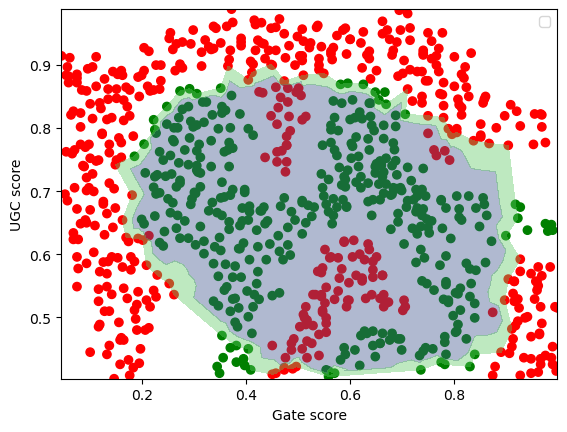

In [75]:
colors = np.where(y == 1, 'red', 'green')
plt.scatter(x[:,0], x[:,1],c=colors)
# plt.contour(x_points,y_points,y_pred)
plt.tricontourf(x[:,0], x[:,1], y_pred.reshape(len(y_pred),), 1, alpha = 0.4)
plt.xlabel("Gate score")
plt.ylabel("UGC score")
plt.show()

## RBF Kernel

In [76]:
from cvxopt import matrix, solvers

n = len(y)
C = 2

sq_distance = np.sum((x[:,np.newaxis] - x[np.newaxis,:]) ** 2, axis = 2)
K = np.exp(-30*sq_distance)

P = matrix(np.outer(y,y)*K)
q = matrix(-np.ones((n,1)))
G = matrix(np.vstack((np.eye(n)*-1, np.eye(n))))
h = matrix(np.hstack((np.zeros(n), np.ones(n)*C)))
A = matrix(y, (1,n), 'd')
b = matrix(np.zeros(1))
solvers.options['show_progress'] = False
sol = solvers.qp(P,q,G,h,A,b)
alphas = np.array(sol['x'])


In [77]:
threshold = 1e-3
sv = ((alphas > threshold) * (alphas < C)).flatten()
opt_w = np.dot(x[sv].T, alphas[sv]*y[sv, np.newaxis])
opt_w

array([[-0.71323361],
       [ 2.18565992]])

In [78]:
# b = np.mean(y - x.dot(opt_w))
b = 0
y_sum = 0

for i in range(len(y)):
    y_sum += y[i]
    
temp = 0    
for i in range(K.shape[0]):
    for j in range(K.shape[1]):
        temp += alphas[i]*y[i]*K[i,j]

b = (1/len(y))*(y_sum - temp)   
print(b)

[0.71826867]


In [79]:
y_pred = np.zeros(len(y))
        
for i in range(len(y)):
    sum = 0
    for j in range(len(y)):
        sum += alphas[j]*y[j]*K[i,j]
    sum += b
    y_pred[i] = sum
    
    if y_pred[i] > 0:
        y_pred[i] = 1
    else:
        y_pred[i] = -1
        
count = 0

for i in range(len(y_pred)):
    if y_pred[i] == y[i]:
        count += 1

acc = count / len(y)
acc *= 100

print(f"accuracy = {acc}") 

accuracy = 97.21900347624566


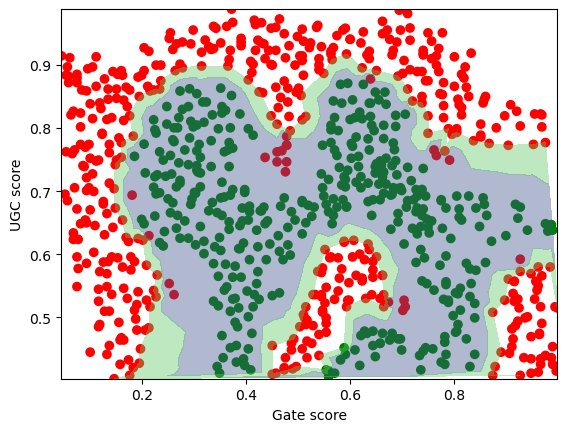

In [80]:
colors = np.where(y == 1, 'red', 'green')
plt.scatter(x[:,0], x[:,1],c=colors)
# plt.contour(x_points,y_points,y_pred)
plt.tricontourf(x[:,0], x[:,1], y_pred.reshape(len(y_pred),), 1, alpha=0.4)
plt.xlabel("Gate score")
plt.ylabel("UGC score")
plt.show()

**TASK 4**: PCA and Decision Tree                       **(24 Marks)**

Now lets change the dataset and load dataset given below. 

The dataset we used in the previous section had just two numeric attributes. In this section we will look at a slightly sophisticated dataset having a mix of numeric and categorical attributes describing an adult. The dataset can be downloaded from https://archive.ics.uci.edu/ml/datasets/adult. The task is to predict whether the person defined by the given set of attributes earns more than 50000 or less (Binary classification task). Implement the following and state your results with respect to this dataset.

1. Implement the decision tree algorithm to classify whether the income of a particular user exceeds \$50K per year or not. Divide the data into two sets: Training set  ($80\%$) and validation set ($20\%$). Plot the training error and validation error against the number of nodes present in the decision tree. (3 + 1 + 3 Marks)

2. Create 10 datasets using feature bagging and instance bagging technique and rerun the part 1 to find the optimal decision tree for each of these datasets. Report the final error by taking the average of each decision tree and report your findings. Did the performance improved? (You can fix number of nodes as best value obtained in previous part). (3 + 3 + 3 Marks)

3. Implement PCA to find optimal number of features. Report the error decision tree found for these optimal features against when we had all features into account.  (5+3 Marks)

Write your code by creating cells below.


In [81]:
# To access files stored in Google Drive, following block import is used
# If using on a local system, please comment the lines below in this code block

from google.colab import drive
drive.mount('/content/MyDrive', force_remount = True)

ModuleNotFoundError: No module named 'google.colab'

In [61]:
#write your code here You can create more cells
data = pd.read_csv("adult.csv")
data.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [62]:
len(data)

32560

In [63]:
data.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain','capital-loss','hours-per-week','native-country','income']
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [64]:
data["occupation"].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

In [65]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data['income'] = label_encoder.fit_transform(data['income'])

In [66]:
X = data.drop("income", axis = 1)
y = data['income']


In [67]:
cat_columns = ['workclass','education','marital-status', 'occupation','relationship','race','sex','native-country']
num_columns = ['age','fnlwgt','education-num','capital-gain','capital-loss','hours-per-week']

for num_col in num_columns:
    X[num_col] = (X[num_col] - np.mean(X[num_col])) / (np.std(X[num_col]))
    
for cat_col in cat_columns:
    X[cat_col] = pd.Categorical(X[cat_col]).codes
    
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)    

In [68]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(criterion='entropy')
tree_clf.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [69]:
from sklearn.metrics import accuracy_score

y_pred = tree_clf.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred) * 100)


Accuracy: 81.06572481572482


### 4.1 Plot the training error and validation error against the number of nodes present in the decision tree.

Best number of nodes = 100
Best accuracy = 0.8584152334152334


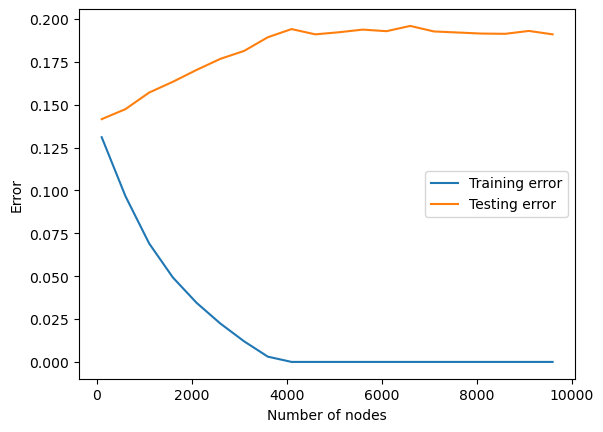

In [70]:
num_nodes = []
training_error = []
testing_error = []

best_num_nodes = 0
best_accuracy = 0

for nodes in range(100,10000,500):
    num_nodes.append(nodes)
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)   
    
    tree_clf = DecisionTreeClassifier(max_leaf_nodes = nodes)
    tree_clf.fit(X_train,y_train)
    
    y_pred_test = tree_clf.predict(X_test)
    y_pred_train = tree_clf.predict(X_train)
    
    test_error = 1 - accuracy_score(y_test, y_pred_test)
    train_error = 1 - accuracy_score(y_train, y_pred_train)
    training_error.append(train_error)
    testing_error.append(test_error)
    
    if 1-test_error > best_accuracy:
        best_accuracy = 1-test_error
        best_num_nodes = nodes
        
print(f"Best number of nodes = {best_num_nodes}")  
print(f"Best accuracy = {best_accuracy}")
    
plt.plot(num_nodes,training_error)
plt.plot(num_nodes,testing_error)
plt.legend(["Training error", "Testing error"])
plt.ylabel("Error")
plt.xlabel("Number of nodes")
plt.show()

### 4.2 Create 10 datasets using feature bagging and instance bagging technique and rerun the part 1 to find the optimal decision tree for each of these datasets.

In [79]:
import random

num_of_features = random.sample(range(1, 15), 14)
num_of_samples = 10000
accuracies = []

avg_err = 0.0

# Generating random number of features and 10000 samples from dataset
for features in num_of_features:
    samples_idx = random.sample(range(0,len(X)), 10000)
    features_idx = random.sample(range(0,14), features)
    X_arr = np.array(X)
    y_arr = np.array(y)
     
    x = X_arr[samples_idx,:]
    x = x[:,features_idx]
    y_arr = y_arr[samples_idx]
    
    num_nodes = []
    training_error = []
    testing_error = []

    best_num_nodes = 0
    best_accuracy = 0
    
    num = 0
    
    # Varying the number of nodes in the decision tree
    for nodes in range(100,5000,500):
        num = num+1
        X_train,X_test,y_train,y_test = train_test_split(x,y_arr,test_size=0.2,random_state=42)   

        tree_clf = DecisionTreeClassifier(max_leaf_nodes = nodes)
        tree_clf.fit(X_train,y_train)

        y_pred_test = tree_clf.predict(X_test)
        y_pred_train = tree_clf.predict(X_train)

        test_error = 1 - accuracy_score(y_test, y_pred_test)
        train_error = 1 - accuracy_score(y_train, y_pred_train)
        training_error.append(train_error)
        testing_error.append(test_error)

        if 1-test_error > best_accuracy:
            best_accuracy = 1-test_error
            best_num_nodes = nodes
    
    print(f"Number of features = {features} and number of instances = {10000}")
    print(f"Best number of nodes = {best_num_nodes}")  
    print(f"Best accuracy = {best_accuracy}")
    avg_err += (1 - best_accuracy)
    
    
avg_err = avg_err / num   
    


Number of features = 14 and number of instances = 10000
Best number of nodes = 100
Best accuracy = 0.8485
Number of features = 10 and number of instances = 10000
Best number of nodes = 100
Best accuracy = 0.8115
Number of features = 9 and number of instances = 10000
Best number of nodes = 100
Best accuracy = 0.844
Number of features = 2 and number of instances = 10000
Best number of nodes = 100
Best accuracy = 0.7675
Number of features = 12 and number of instances = 10000
Best number of nodes = 100
Best accuracy = 0.8435
Number of features = 11 and number of instances = 10000
Best number of nodes = 100
Best accuracy = 0.844
Number of features = 13 and number of instances = 10000
Best number of nodes = 100
Best accuracy = 0.831
Number of features = 5 and number of instances = 10000
Best number of nodes = 100
Best accuracy = 0.832
Number of features = 8 and number of instances = 10000
Best number of nodes = 100
Best accuracy = 0.821
Number of features = 6 and number of instances = 10000


In [80]:
print(f"Average error = {avg_err}")

Average error = 0.25100000000000006


## PCA

### 4.3 Implement PCA to find optimal number of features. Report the error decision tree found for these optimal features against when we had all features into account

In [72]:
data2 = data.sample(5000)

X = data.drop("income", axis = 1)
y = data['income']

cat_columns = ['workclass','education','marital-status', 'occupation','relationship','race','sex','native-country']
num_columns = ['age','fnlwgt','education-num','capital-gain','capital-loss','hours-per-week']

for num_col in num_columns:
    X[num_col] = (X[num_col] - np.mean(X[num_col])) / (np.std(X[num_col]))
    
for cat_col in cat_columns:
    X[cat_col] = pd.Categorical(X[cat_col]).codes


In [73]:
# Covariance matrix - Sigma
cov_mat = np.zeros((14,14))

for i in range(len(X)):
    cov_mat += np.array(X.iloc[i]).reshape(14,1) @ np.array(X.iloc[i]).reshape(1,14)

cov_mat /= len(X)    

In [74]:
# Eigen value , Eigen vector
e_val, e_vec = np.linalg.eig(cov_mat)

In [75]:
# Sorting eigen value so that eigen vector corresponsing to largest eigen value can retrieve easily
sort_idx = np.argsort(e_val)
sort_idx = np.flip(sort_idx)

In [76]:
e_vec.shape

(14, 14)

In [77]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Best eigen vector
best_eig_vec = e_vec[sort_idx[0],:]

# Projection of the dataset to largest eigen vector
proj_mat = X.dot(best_eig_vec)
proj_mat = np.array(proj_mat).T
proj_mat = proj_mat.reshape(-1,1)

# spliting the dataset into train and test data
X_train,X_test,y_train,y_test = train_test_split(proj_mat,y,test_size=0.2,random_state=42)  

# Decision tree model
tree_clf = DecisionTreeClassifier(criterion='entropy')
tree_clf.fit(X_train,y_train)

# Predicted output
y_pred = tree_clf.predict(X_test)

best_eig_vec = e_vec[sort_idx[0],:]
proj_mat = X.dot(best_eig_vec)

print("For 1 - Dimension")
print('Accuracy:', accuracy_score(y_test, y_pred)%100)

# projecting the dataset on eigen vectors and displaying accuracy
for i in range(1,len(e_vec)):
    eigen_vec = e_vec[sort_idx[i],:]
    proj_mat = np.vstack((proj_mat, X.dot(eigen_vec)))
    proj_mat = np.array(proj_mat).T
    
    X_train,X_test,y_train,y_test = train_test_split(proj_mat,y,test_size=0.2,random_state=42)  

    tree_clf = DecisionTreeClassifier(criterion='entropy')
    tree_clf.fit(X_train,y_train)
    y_pred = tree_clf.predict(X_test)
    
    print(f"For {i+1} -Dimension")
    print('Error:', accuracy_score(y_test, y_pred)%100) 
    
    proj_mat = np.array(proj_mat).T
    

For 1 - Dimension
Accuracy: 0.6847358722358723
For 2 -Dimension
Error: 0.7185196560196561
For 3 -Dimension
Error: 0.7536855036855037
For 4 -Dimension
Error: 0.7392506142506142
For 5 -Dimension
Error: 0.7676597051597052
For 6 -Dimension
Error: 0.7722665847665847
For 7 -Dimension
Error: 0.7781019656019657
For 8 -Dimension
Error: 0.7751842751842751
For 9 -Dimension
Error: 0.7790233415233415
For 10 -Dimension
Error: 0.7902334152334153
For 11 -Dimension
Error: 0.7883906633906634
For 12 -Dimension
Error: 0.7926904176904177
For 13 -Dimension
Error: 0.789465601965602
For 14 -Dimension
Error: 0.7896191646191646


## For optimal features, minimum error  = 22.62% and when considering all features, minimum error  = 14.16%

## DO PREPARE A SEPARATE REPORT (in PDF format) for all your observations in each question. You can report any other observations as well and use your creativity to understand the concepts.